In [1]:
# download data dari yahoo finance
import yfinance as yf
start_date = '2023-07-01'
end_date = '2024-07-24'
data=yf.download('NCKL.JK',start_date,end_date)
close_price_NCKL = data['Close']

[*********************100%%**********************]  1 of 1 completed


In [12]:
# mengurutkan data dari bawah
close_price_NCKL_reverse = close_price_NCKL.iloc[::-1]

# mereset index data
close_price_NCKL_reverse.reset_index(drop=True, inplace=True)

<Axes: title={'center': 'NCKL Stock Price'}, xlabel='Time', ylabel='Close Price'>

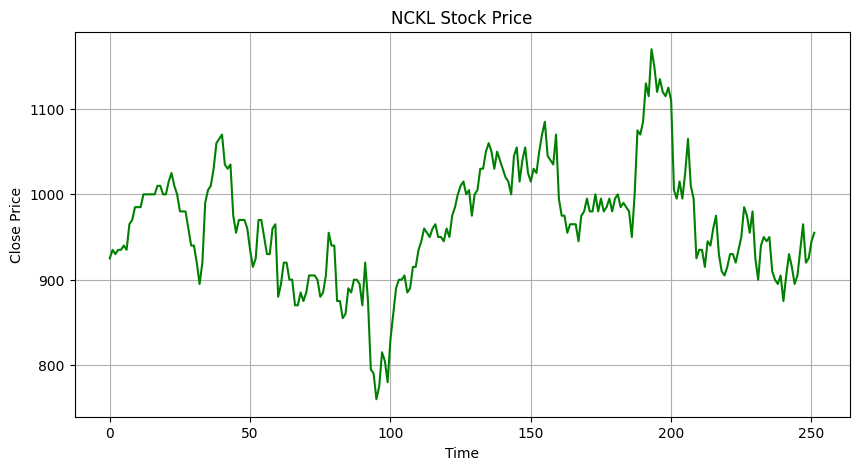

In [28]:
# membuat line chart data NCKL
close_price_NCKL_reverse.plot(xlabel='Time',ylabel='Close Price', title='NCKL Stock Price', 
                              color='g', grid=True, figsize=(10,5))

In [23]:
# Data preprocessing
import numpy as np

0#Reshape & Normalisasi Data
data = close_price_NCKL_reverse.values.reshape(-1, 1)  
data_normalized = data / np.max(data) 

In [25]:
# Membagi data menjadi data training dan data testing
train_size = int(len(data_normalized) * 0.8)
train_data = data_normalized[:train_size]
test_data = data_normalized[train_size:]

In [26]:
# function untuk membuat model long Short Term Memory Network (LSTM)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def create_lstm_model(units, activation, learning_rate):
    model = Sequential()
    model.add(LSTM(units=units, activation=activation, input_shape=(1, 1)))
    model.add(Dense(units=1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

In [27]:
# mendefinisikan proses hyperparameter tuning
lstm_units = [50, 100, 200]
lstm_activations = ['relu', 'tanh']
learning_rates = [0.001, 0.01, 0.1]
epochs = 100
batch_size = 32

# menjalankan hyperparameter tuning untuk model LSTM
best_rmse = float('inf')
best_lstm_model = None

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
for units in lstm_units:
    for activation in lstm_activations:
        for learning_rate in learning_rates:
            
            # Membentuk model LSTM
            model = create_lstm_model(units=units, activation=activation, learning_rate=learning_rate)
            model.fit(train_data[:-1].reshape(-1, 1, 1), train_data[1:], epochs=epochs, batch_size=batch_size, verbose=0)

            # Prediksi data
            test_predictions = model.predict(test_data[:-1].reshape(-1, 1, 1)).flatten()

            # Menghitung Root Squared Mean Error (RMSE)
            rmse = np.sqrt(mean_squared_error(test_data[1:], test_predictions))

            # Menentukan model dengan RMSE terendah
            if rmse < best_rmse:
                best_rmse = rmse
                best_lstm_model = model

C:\Users\Gaby\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 350ms/step


C:\Users\Gaby\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 333ms/step


C:\Users\Gaby\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001FBEC683A60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 330ms/step


C:\Users\Gaby\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 316ms/step


C:\Users\Gaby\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 334ms/step


C:\Users\Gaby\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step


C:\Users\Gaby\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


C:\Users\Gaby\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


C:\Users\Gaby\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


C:\Users\Gaby\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


C:\Users\Gaby\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


C:\Users\Gaby\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


C:\Users\Gaby\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


C:\Users\Gaby\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


C:\Users\Gaby\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


C:\Users\Gaby\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


C:\Users\Gaby\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


C:\Users\Gaby\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


In [31]:
# Prediksi keseluruhan data menggunakan model LSTM terbaik
all_lstm_predictions = best_lstm_model.predict(data_normalized[:-1].reshape(-1, 1, 1)).flatten()

# Normalisasi data hasil prediksi menggunakan model LSTM
all_lstm_predictions = all_lstm_predictions * np.max(data)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step


In [32]:
# Membuat model Support Vector Machines (SVM) dan memprediksi data menggunakan model tersebut
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svm_model = SVR()

svm_params = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1]
}

svm_grid_search = GridSearchCV(svm_model, svm_params, scoring='neg_mean_squared_error')
svm_grid_search.fit(np.arange(len(close_price_NCKL_reverse)).reshape(-1, 1), close_price_NCKL_reverse)
svm_best_model = svm_grid_search.best_estimator_
svm_predictions = svm_best_model.predict(np.arange(len(close_price_NCKL_reverse)).reshape(-1, 1))

In [ ]:
# Membuat model Random Forest, XGBoost, LightGBM
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor

# Random Forest Model
rf_model = RandomForestRegressor()

rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10]
}

rf_grid_search = GridSearchCV(rf_model, rf_params, scoring='neg_mean_squared_error')
rf_grid_search.fit(np.arange(len(close_price_NCKL_reverse)).reshape(-1, 1), close_price_NCKL_reverse)
rf_best_model = rf_grid_search.best_estimator_
rf_predictions = rf_best_model.predict(np.arange(len(close_price_NCKL_reverse)).reshape(-1, 1))

# Gradient Boosting Methods (XGBoost)
xgb_model = XGBRegressor()

xgb_params = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7]
}

xgb_grid_search = GridSearchCV(xgb_model, xgb_params, scoring='neg_mean_squared_error')
xgb_grid_search.fit(np.arange(len(close_price_NCKL_reverse)).reshape(-1, 1), close_price_NCKL_reverse)
xgb_best_model = xgb_grid_search.best_estimator_
xgb_predictions = xgb_best_model.predict(np.arange(len(close_price_NCKL_reverse)).reshape(-1, 1))

# Gradient Boosting Methods (LightGBM)
lgbm_model = LGBMRegressor()

lgbm_params = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7]
}

lgbm_grid_search = GridSearchCV(lgbm_model, lgbm_params, scoring='neg_mean_squared_error')
lgbm_grid_search.fit(np.arange(len(close_price_NCKL_reverse)).reshape(-1, 1), close_price_NCKL_reverse)
lgbm_best_model = lgbm_grid_search.best_estimator_
lgbm_predictions = lgbm_best_model.predict(np.arange(len(close_price_NCKL_reverse)).reshape(-1, 1))


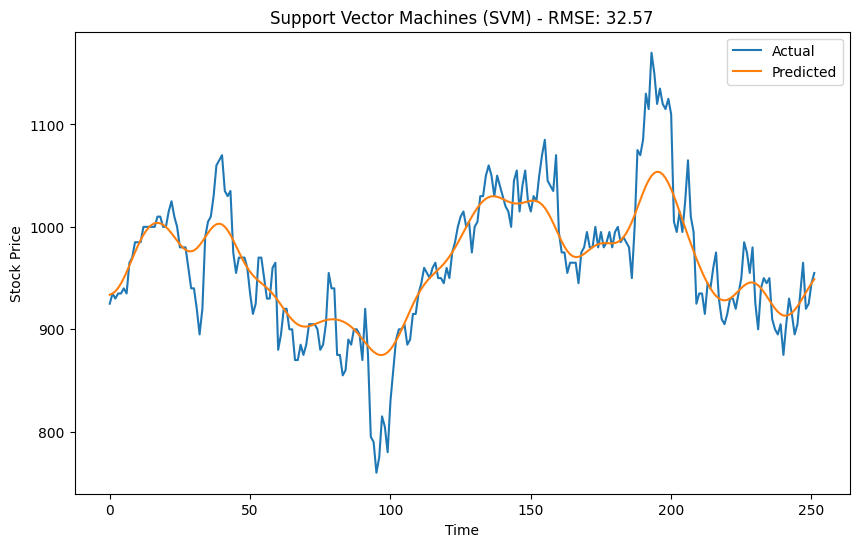

Best Hyperparameters for Support Vector Machines (SVM):
SVR(C=10, gamma=0.01)
-----------------------------


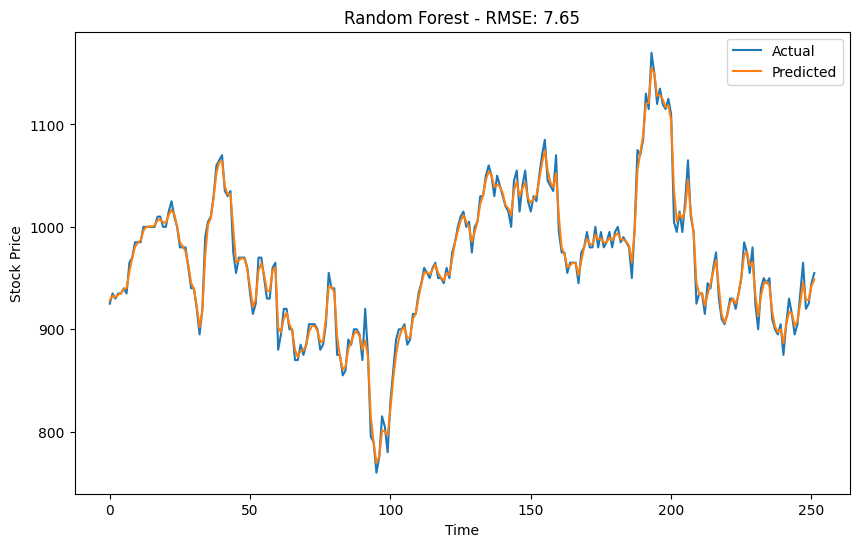

Best Hyperparameters for Random Forest:
RandomForestRegressor(max_depth=10, n_estimators=50)
-----------------------------


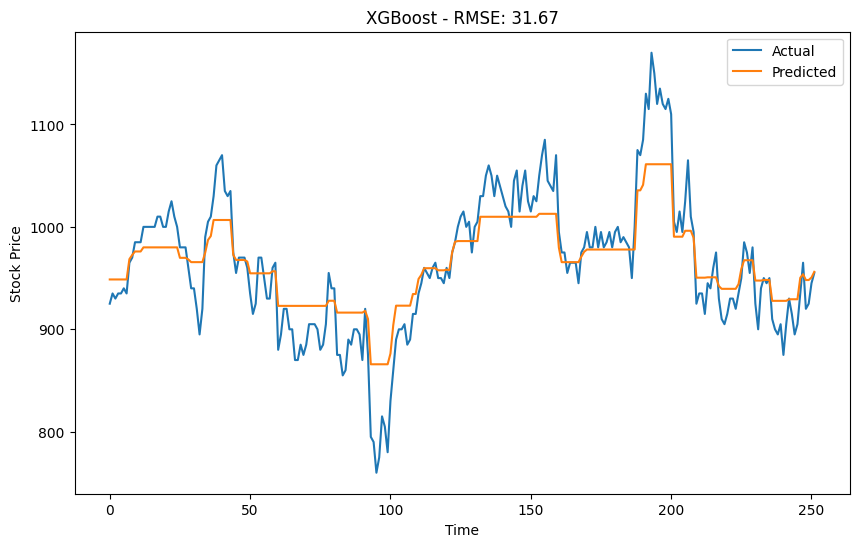

Best Hyperparameters for XGBoost:
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
-----------------------------


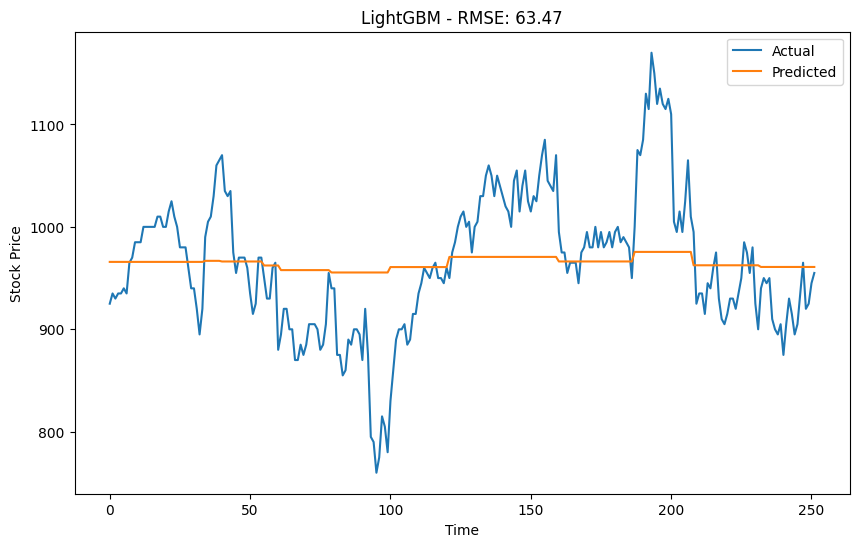

Best Hyperparameters for LightGBM:
LGBMRegressor(learning_rate=0.001, max_depth=5)
-----------------------------


In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Function untuk menghitung RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# List model dan hasil prediksi tiap model
model_names = ['Support Vector Machines (SVM)', 'Random Forest', 'XGBoost', 'LightGBM']
predictions = [svm_predictions, rf_predictions, xgb_predictions, lgbm_predictions]
best_models = [svm_best_model, rf_best_model, xgb_best_model, lgbm_best_model]

# Memotong data actual yang disesuaikan dengan jumlah data prediksi
actual_values_reverse = close_price_NCKL_reverse[-len(svm_predictions):]

# Mengevaluasi model dan memvisualisasikannya dalam grafik
for i, model_name in enumerate(model_names):
    model_prediction = predictions[i]
    model_prediction_truncated = model_prediction[-len(actual_values_reverse):]  
    model_rmse = rmse(actual_values_reverse, model_prediction_truncated)

    # Membuat plot actual vs prediksi
    plt.figure(figsize=(10, 6))
    plt.plot(actual_values_reverse, label='Actual')
    plt.plot(model_prediction_truncated, label='Predicted')
    plt.title(f"{model_name} - RMSE: {model_rmse:.2f}")
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

    # Menampilkan best hyperparameter untuk tiap model
    best_model = best_models[i]
    print(f"Best Hyperparameters for {model_name}:")
    print(best_model)
    print("-----------------------------")

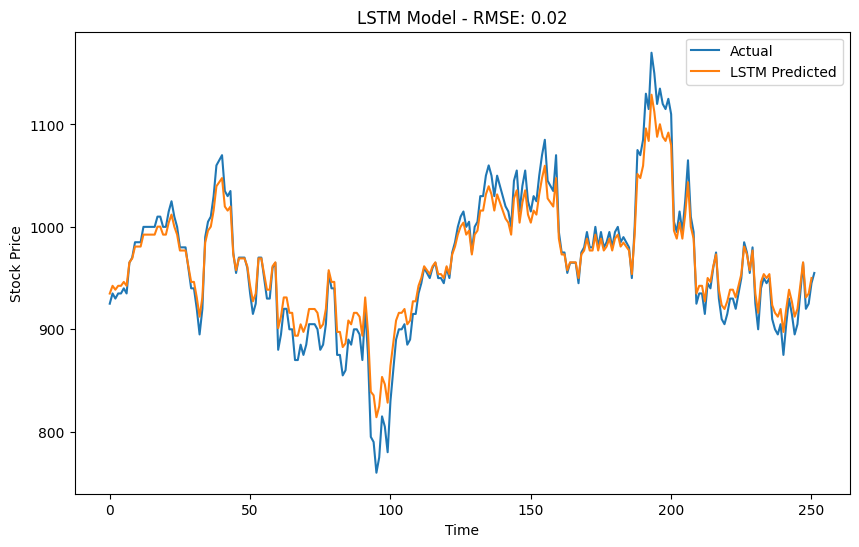

In [37]:
# Membuat plot hasil prediksi dengan model LSTM
plt.figure(figsize=(10, 6))
plt.plot(actual_values_reverse, label='Actual')
plt.plot(all_lstm_predictions, label='LSTM Predicted')
plt.title(f"LSTM Model - RMSE: {best_rmse:.2f}")
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


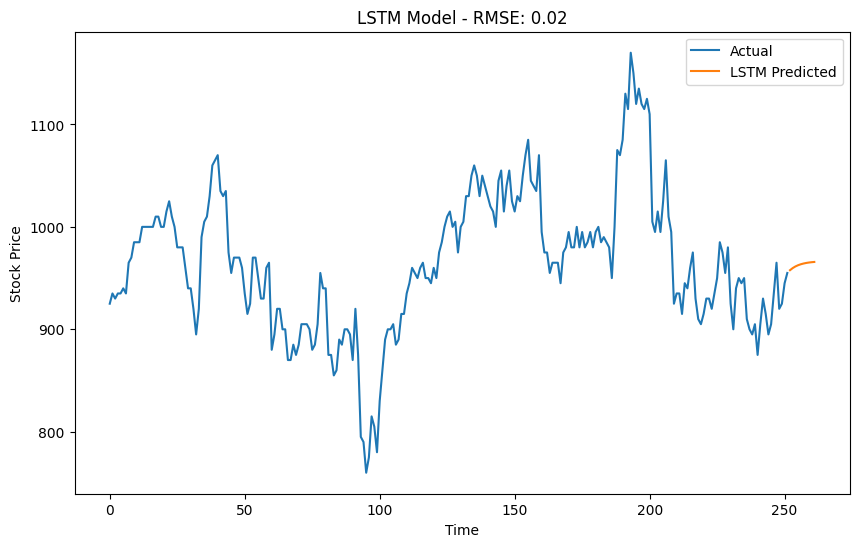

Prediksi harga saham NCKL 10 hari kedepan:
Day 1: 957.70
Day 2: 959.77
Day 3: 961.35
Day 4: 962.57
Day 5: 963.50
Day 6: 964.22
Day 7: 964.76
Day 8: 965.19
Day 9: 965.51
Day 10: 965.76


In [43]:
# Function untuk prediksi harga saham NCKL dengan model LSTM (model dengan RMSE terendah)

scaling_factor = np.max(close_price_NCKL_reverse)
def predict_future_lstm(model, data, num_predictions, scaling_factor):
    predictions = []

    # data terakhir pada dataset
    last_data_point = data[-1]

    for _ in range(num_predictions):
        # Predict the next time step
        prediction = model.predict(last_data_point.reshape(1, 1, 1))
        predictions.append(prediction[0, 0])

        last_data_point = np.append(last_data_point[1:], prediction)

    # Normalisasi data prediksi
    predictions = np.array(predictions) * scaling_factor

    return predictions

# Prediksi harga saham 10 hari kedepan

num_predictions = 10
lstm_predictions = predict_future_lstm(best_lstm_model, data_normalized, num_predictions, scaling_factor)

# Plot data prediksi harga saham 10 hari kedepan
plt.figure(figsize=(10, 6))
plt.plot(close_price_NCKL_reverse, label='Actual')
plt.plot(np.arange(len(close_price_NCKL_reverse), len(close_price_NCKL_reverse) + num_predictions), lstm_predictions, label='LSTM Predicted')
plt.title(f"LSTM Model - RMSE: {best_rmse:.2f}")
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Hasil prediksi data harga saham NCKL 10 hari kedepan
print("Prediksi harga saham NCKL 10 hari kedepan:")
for i, prediction in enumerate(lstm_predictions, start=1):
    print(f"Day {i}: {prediction:.2f}")